# Data Analysis on Tik Tok songs 2022
## Siyuan Zhang


# Description


This is a data analysis project, which used python numpy, pandas, seaborn, sklearn to visualize and find the releations between each data. The main thing I am going to analysis is the rank of track, artist, album..., and the corelation between them. And I will apply a linear regression model to see the data corelations. And find the predict on all the columns. 


# Dataset

- https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2022
- Name: "TikTok_songs_2022.csv"
- Main column from observation: track_name, track_pop, artist_name, artise_pop.....


# Setup

In [1]:
#import numpy to store numreical value
import numpy as np
#import panda to read csv file
import pandas as pd
#import seaborn to visualize
import seaborn as sns
##import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
#import self developed function 
from my_module import functions , test_functions

In [2]:
#read the csv file as df
df = pd.read_csv("TikTok_songs_2022.csv")

In [3]:
# show to data set
df


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800


In [4]:
# show dataset shape
df.shape

(263, 18)

In [5]:
# look at the column of data
df.head


<bound method NDFrame.head of                                  track_name      artist_name  artist_pop  \
0    Running Up That Hill (A Deal With God)        Kate Bush          81   
1                                 As It Was     Harry Styles          91   
2                                   Sunroof      Nicky Youre          73   
3                                Heat Waves    Glass Animals          80   
4                           About Damn Time            Lizzo          81   
..                                      ...              ...         ...   
258              The Less I Know The Better      Tame Impala          78   
259                              Dandelions          Ruth B.          75   
260           Jimmy Cooks (feat. 21 Savage)            Drake          95   
261                            Good Looking  Suki Waterhouse          64   
262                                 INFERNO        Sub Urban          67   

                          album  track_pop  danceability 

In [6]:
#Preview of the data
df.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000


# Data Cleaning 

In [7]:
# data cleaning 
df.isnull().sum()
df.dropna(inplace=True)


# Data Analysis

## Find the top five hits

In [8]:

top_hits = df["artist_name"].value_counts(ascending = False)


In [9]:
top_five_hits = top_hits[:5]

In [10]:
top_five_hits

Doja Cat     8
Coopex       6
Dame Dame    5
Lil Nas X    4
Farux        4
Name: artist_name, dtype: int64

## Find the most 5 popular artist 

In [11]:
# find the most 5 popular artist 
most_five_art = df.loc[:,["artist_name","artist_pop"]].sort_values('artist_pop', ascending = False)
most_five_art = most_five_art.artist_name.unique()[:5]
most_five_art

array(['Drake', 'The Weeknd', 'Harry Styles', 'Ed Sheeran',
       'Justin Bieber'], dtype=object)

In [12]:
# use get_curr_df function in module to avoid change the original dataset
df1 = functions.get_curr_df(df,"artist_name",most_five_art,'Other')

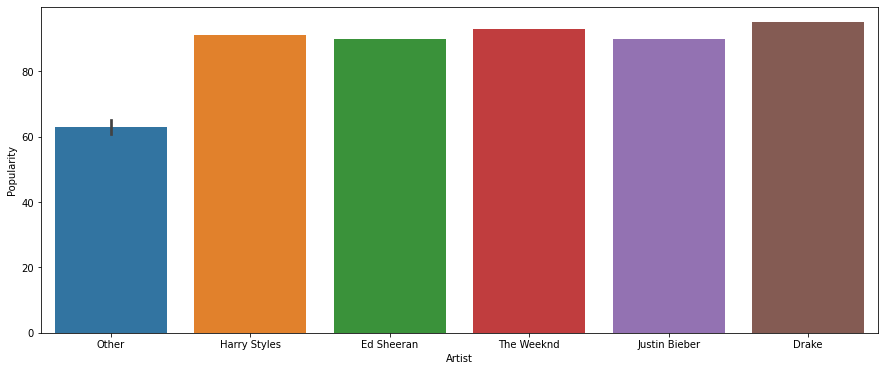

In [13]:
# Barplot of Top five popular artist
functions.plot_pop_art(df1,"artist_name","artist_pop")

## Find the top five track

In [14]:
# top 5 track 
most_five_track = df.loc[:,["track_name","track_pop"]].sort_values('track_pop', ascending = False)
most_five_track = most_five_track[:5]
most_five_track

,track_name,track_pop
5,Glimpse of Us,97
1,As It Was,96
0,Running Up That Hill (A Deal With God),95
52,Late Night Talking,93
260,Jimmy Cooks (feat. 21 Savage),92


In [15]:
list(most_five_track["track_name"])

['Glimpse of Us',
 'As It Was',
 'Running Up That Hill (A Deal With God)',
 'Late Night Talking',
 'Jimmy Cooks (feat. 21 Savage)']

In [16]:
df2 = functions.get_curr_df(df,"track_name",most_five_track["track_name"],'Other')



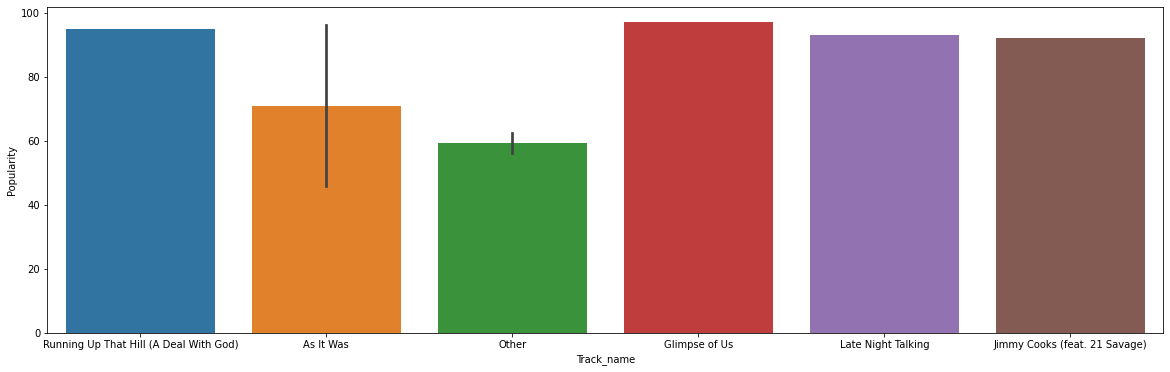

In [17]:
# Top five track
functions.plot_pop_track(df2,"track_name","track_pop")

## Top five artist's album

In [18]:
# Analysis the  Album for top five popular artist 
most_five_art

array(['Drake', 'The Weeknd', 'Harry Styles', 'Ed Sheeran',
       'Justin Bieber'], dtype=object)

In [19]:
df_album = df.loc[df["artist_name"].isin(['Drake', 'The Weeknd', 'Harry Styles', 'Ed Sheeran',
       'Justin Bieber'])]
df_album = df_album.loc[:,["artist_name","album"]]
df_album.isnull()
df_album['artist_name']

1       Harry Styles
48        Ed Sheeran
52      Harry Styles
114       The Weeknd
128    Justin Bieber
220            Drake
223    Justin Bieber
233       The Weeknd
241       The Weeknd
248       Ed Sheeran
260            Drake
Name: artist_name, dtype: object

In [20]:
functions.find_album(df_album,"Drake")

,artist_name,album
220,Drake,Dark Lane Demo Tapes
260,Drake,"Honestly, Nevermind"


In [21]:
df_album


,artist_name,album
1,Harry Styles,As It Was
48,Ed Sheeran,Bad Habits
52,Harry Styles,Harry's House
114,The Weeknd,After Hours
128,Justin Bieber,Justice
220,Drake,Dark Lane Demo Tapes
223,Justin Bieber,Changes
233,The Weeknd,After Hours
241,The Weeknd,Blinding Lights
248,Ed Sheeran,I Don't Care (with Justin Bieber)


## Top  track with high danceablity

In [22]:
# top  track with high danceability

df_dance_track = df[['track_name','danceability']]
df_dance_track

,track_name,danceability
0,Running Up That Hill (A Deal With God),0.629
1,As It Was,0.520
2,Other,0.768
3,Other,0.761
4,Other,0.836
...,...,...
258,Other,0.640
259,Other,0.609
260,Jimmy Cooks (feat. 21 Savage),0.529
261,Other,0.377


In [23]:
df_dance_track = df_dance_track.loc[~df["track_name"].isin(['Other'])]

<AxesSubplot:ylabel='danceability'>

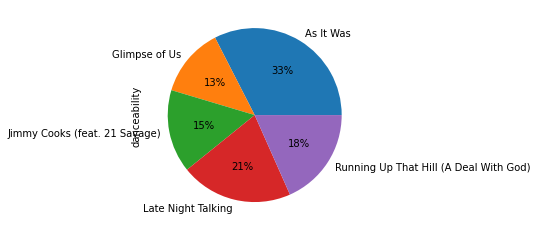

In [24]:
# pie chart to show the most five tarck with high danceablity 
df_dance_track.groupby(['track_name']).sum().plot(legend = False,kind='pie', y='danceability', autopct='%1.0f%%',figsize=(10, 4) )

# Data Prediction

Here we want to see the corelation between the columns

## Heatmap to show the data corelation

/home/sizhang/FinalProject_COGS18_Wi23/my_module/functions.py:77: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,


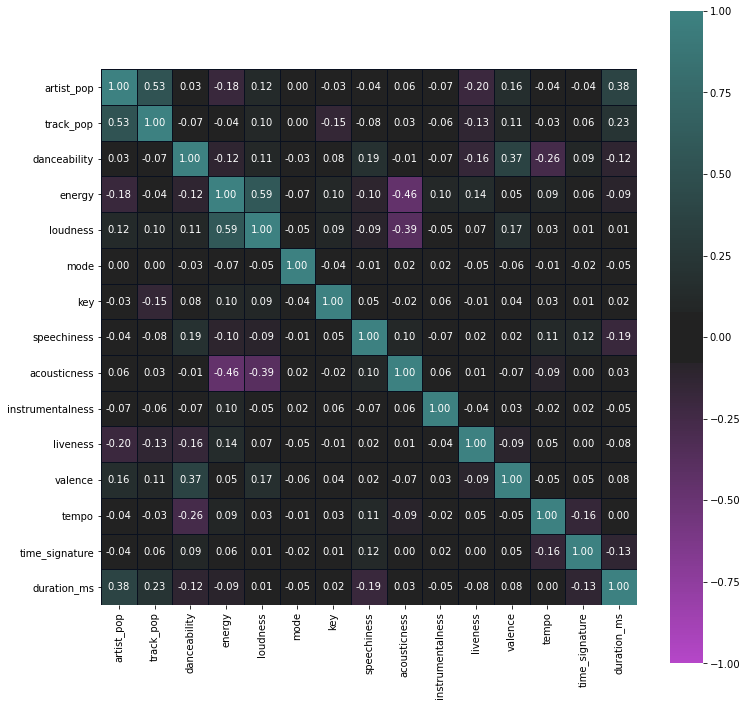

In [25]:

fig= plt.subplots(figsize=(12, 12))
functions.show_heatmap(df)

From the above heatmap, we don't see any data has high corelation.

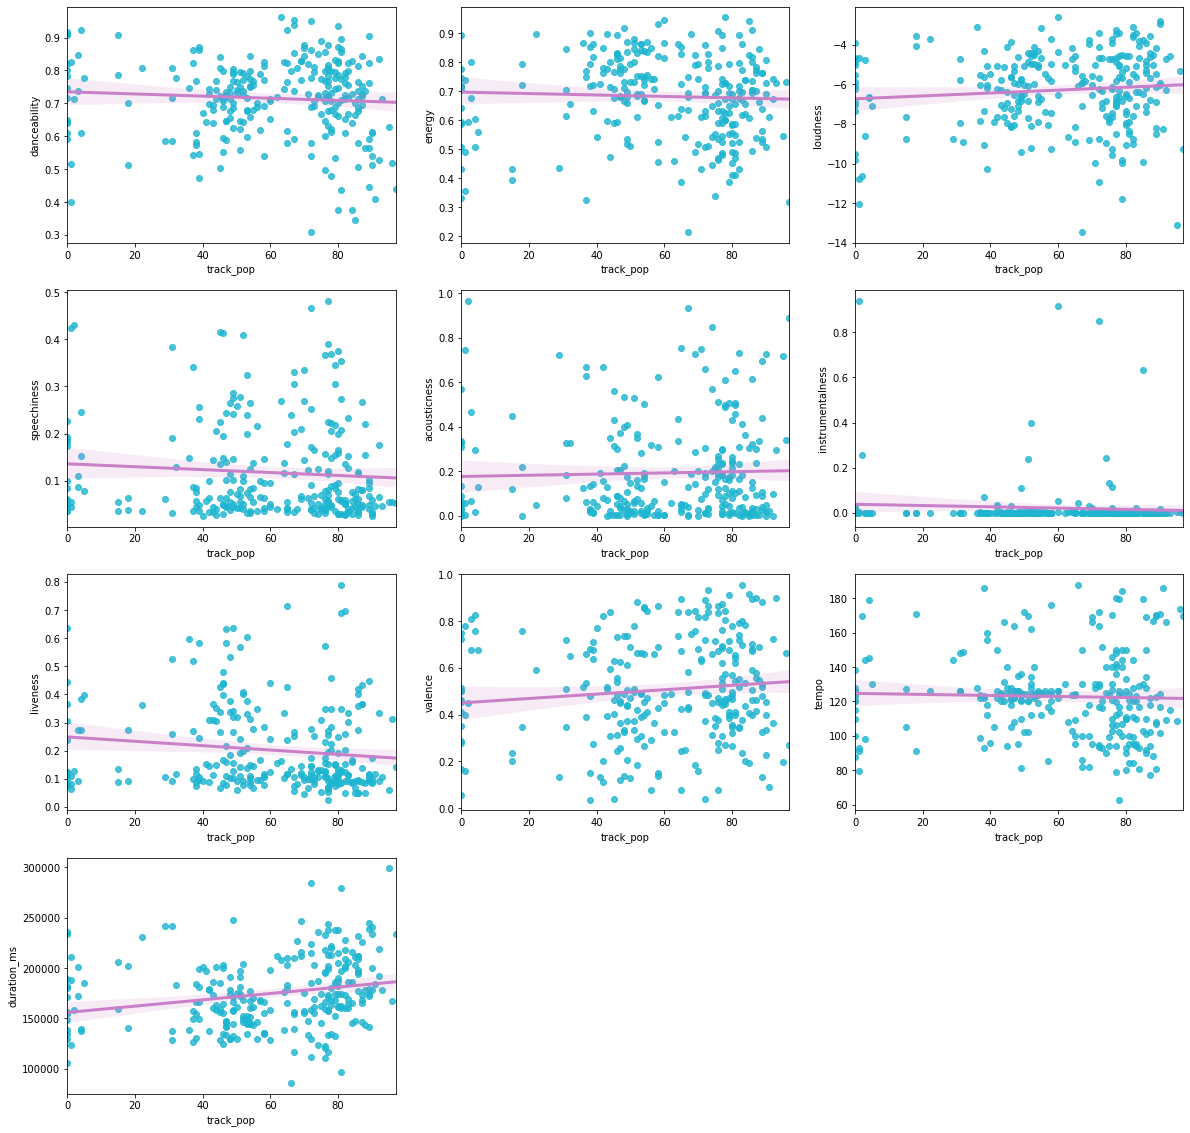

In [26]:
functions.scatter_plot_all_col(df)

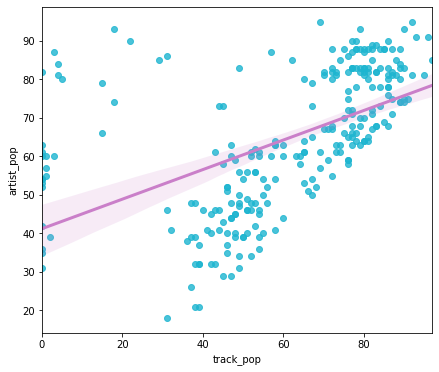

In [27]:
fig, ax = plt.subplots(figsize=(7, 6))
functions.plot_scatter(df,'track_pop','artist_pop','#1db5d0','#ca7fc9',ax)
plt.show()

From above scatterplot, we notice that only artist_pop has higher corelation with track_pop, which means that the popularity of artist has higher track popularity. 

Below we has used history plot and box plot to show the main columns of data distributed.


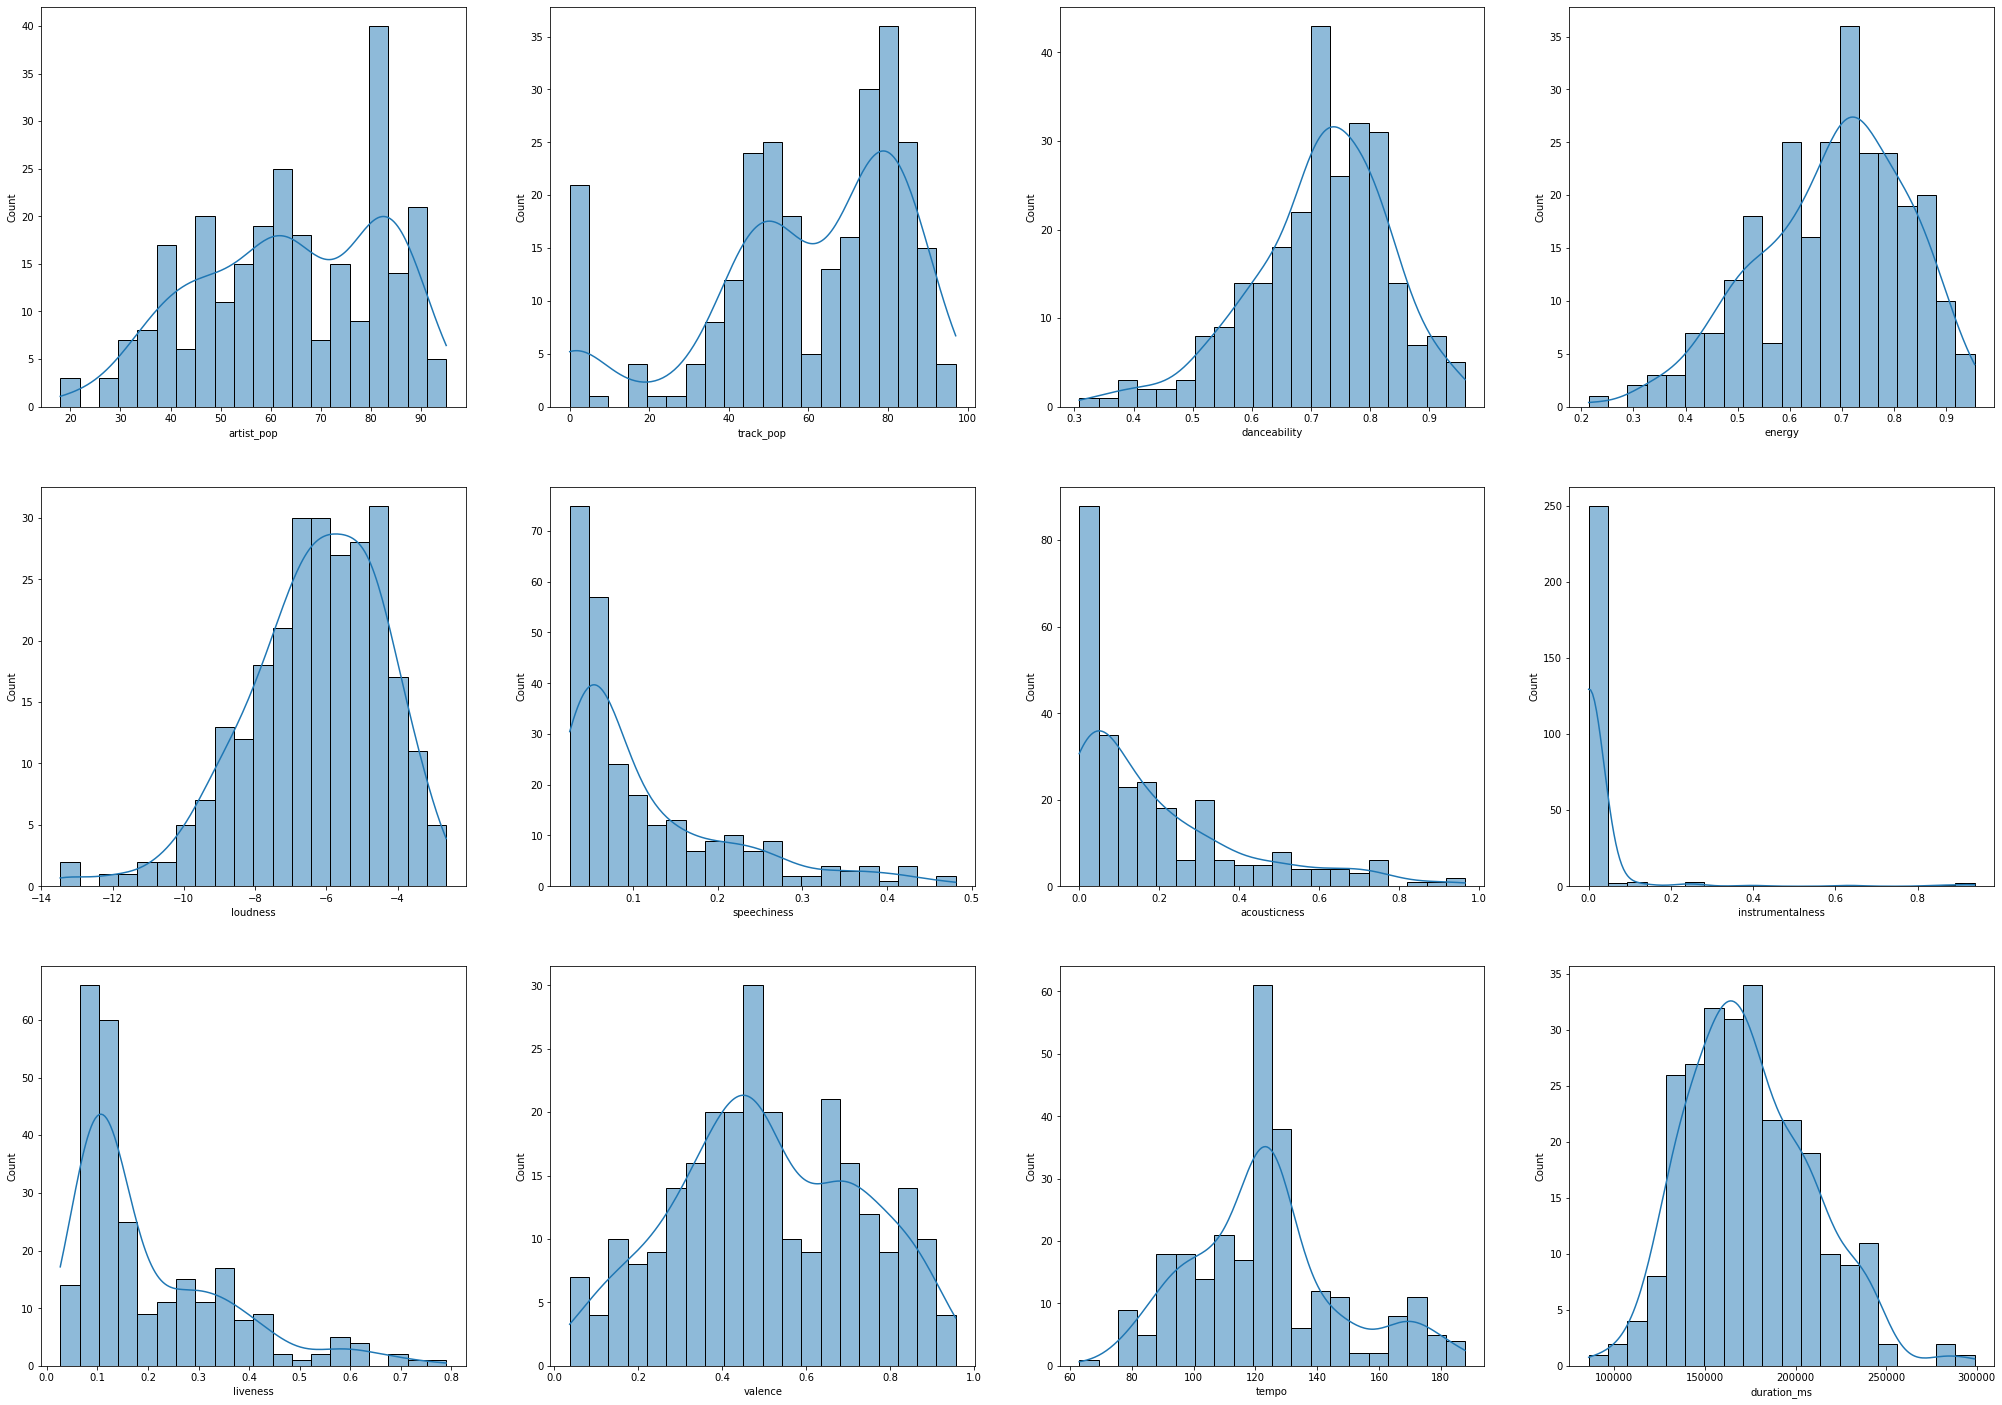

In [28]:
# main columns 
cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
# function to show hist plot
functions.hist_plot(df,cols)

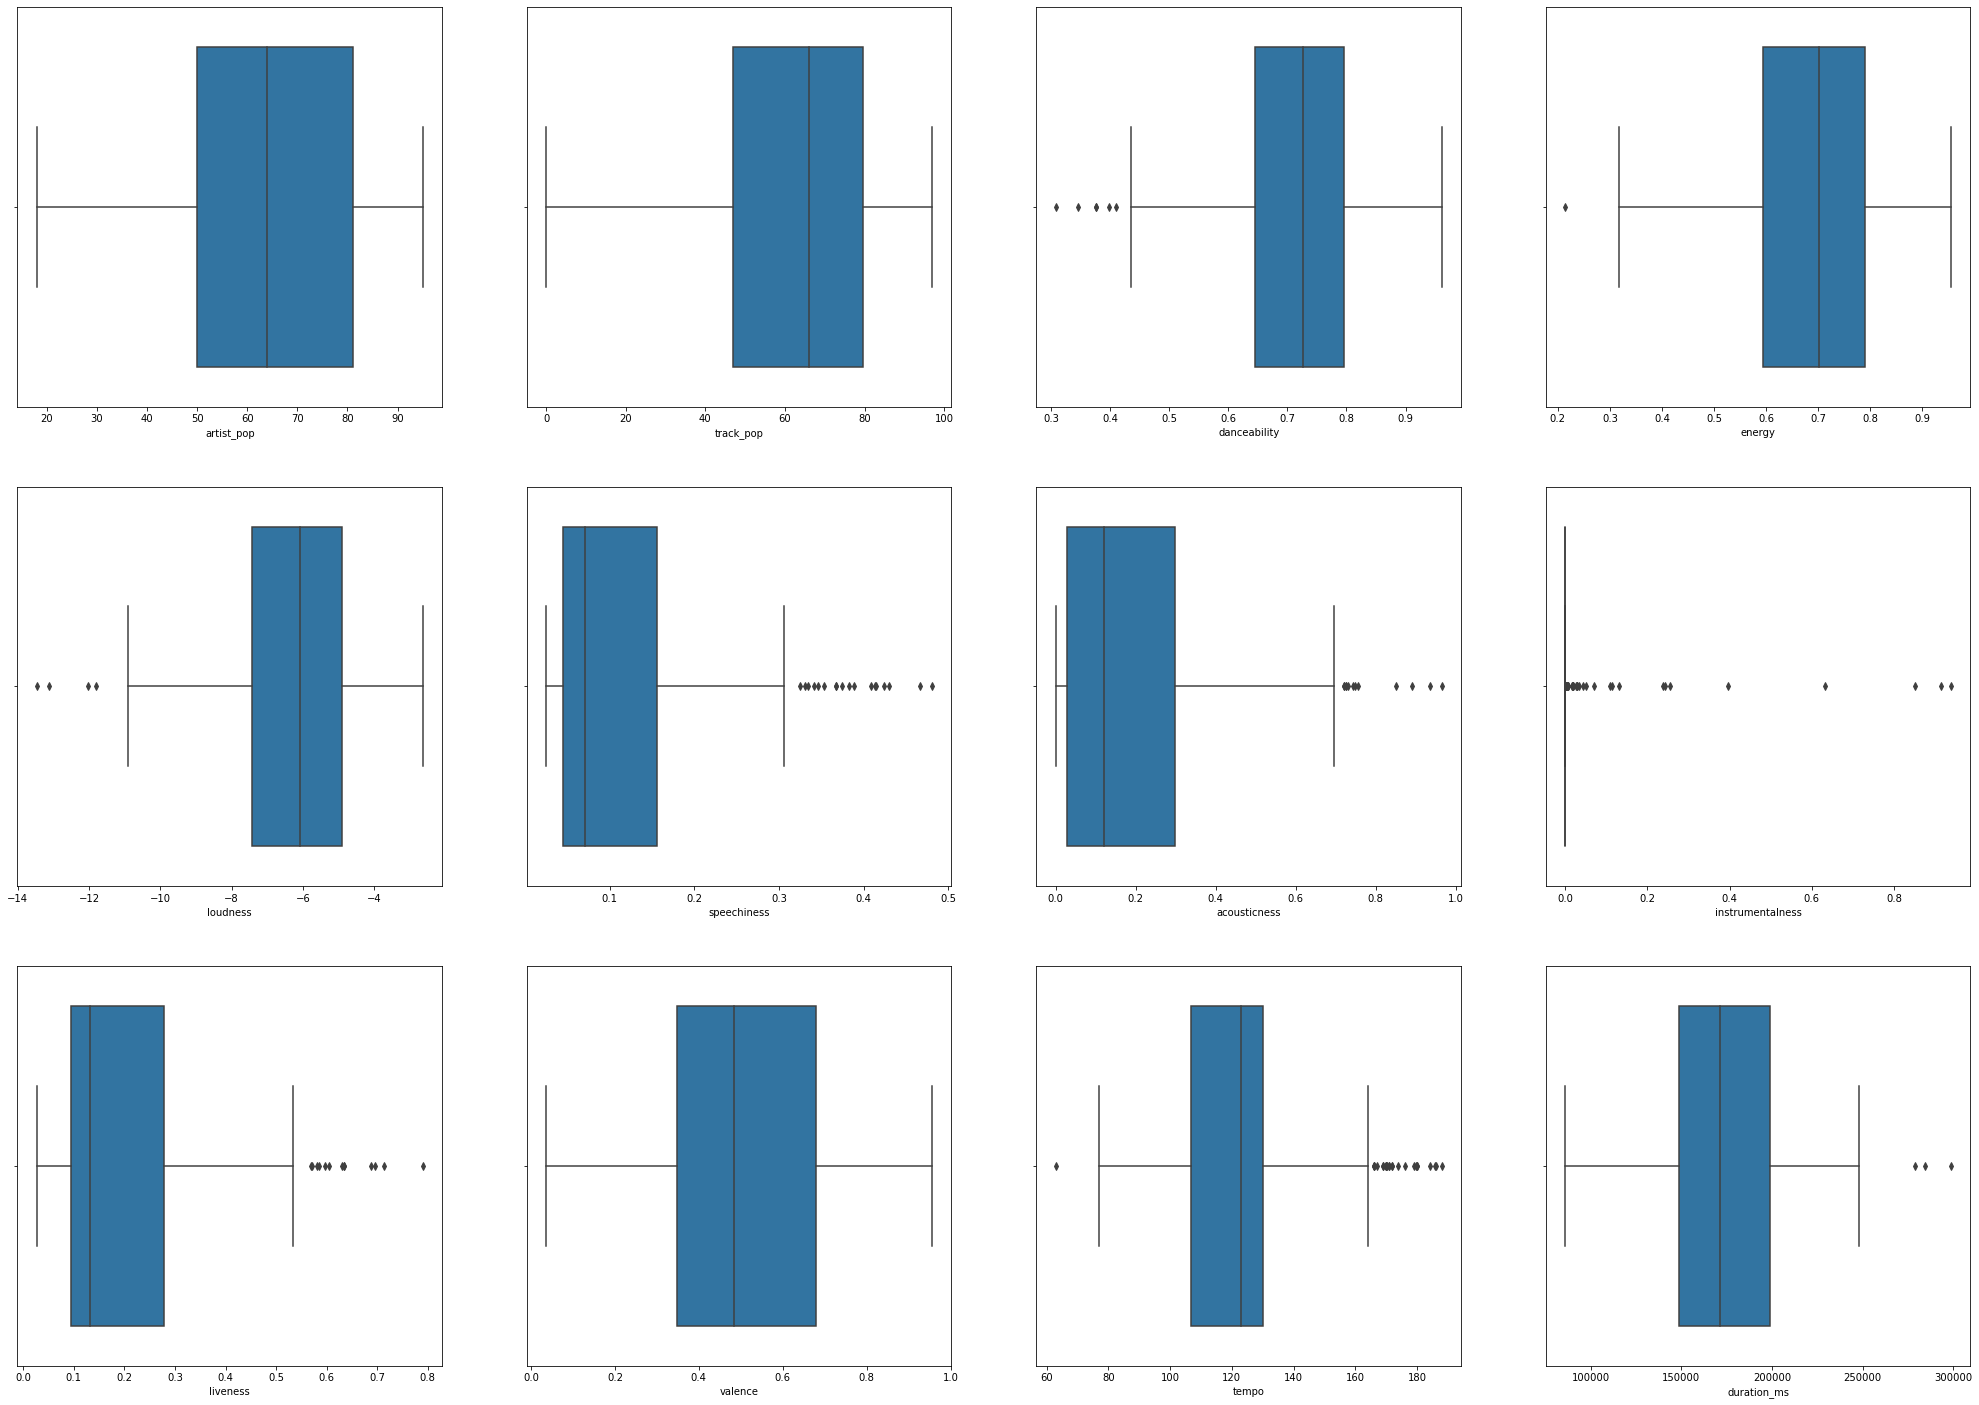

In [29]:
# funciton show box plot from module
functions.box_plot(df,cols)

We observed Artist_pop has the most corelation on track pop. The instrumentalness don't have enought data to show the relation. 

## Linear Regression

Text(0.5, 1.0, 'coef: 0.2795428557863666')

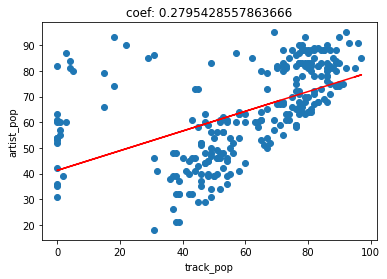

In [30]:
# Here we use sklearn Linear Regression model to predict the relations between each category with track pop 
Model = LinearRegression()
X = df['track_pop'].values.reshape(-1,1)
Y = df['artist_pop'].values.reshape(-1,1)
Model.fit(X,Y)
y_pred = Model.predict(X)
plt.scatter(X,Y)
plt.plot(X,y_pred,color='red')
plt.xlabel('track_pop')
plt.ylabel('artist_pop') 
rsq = 'coef: ' + str(Model.score(X, Y)) 
plt.title(rsq)

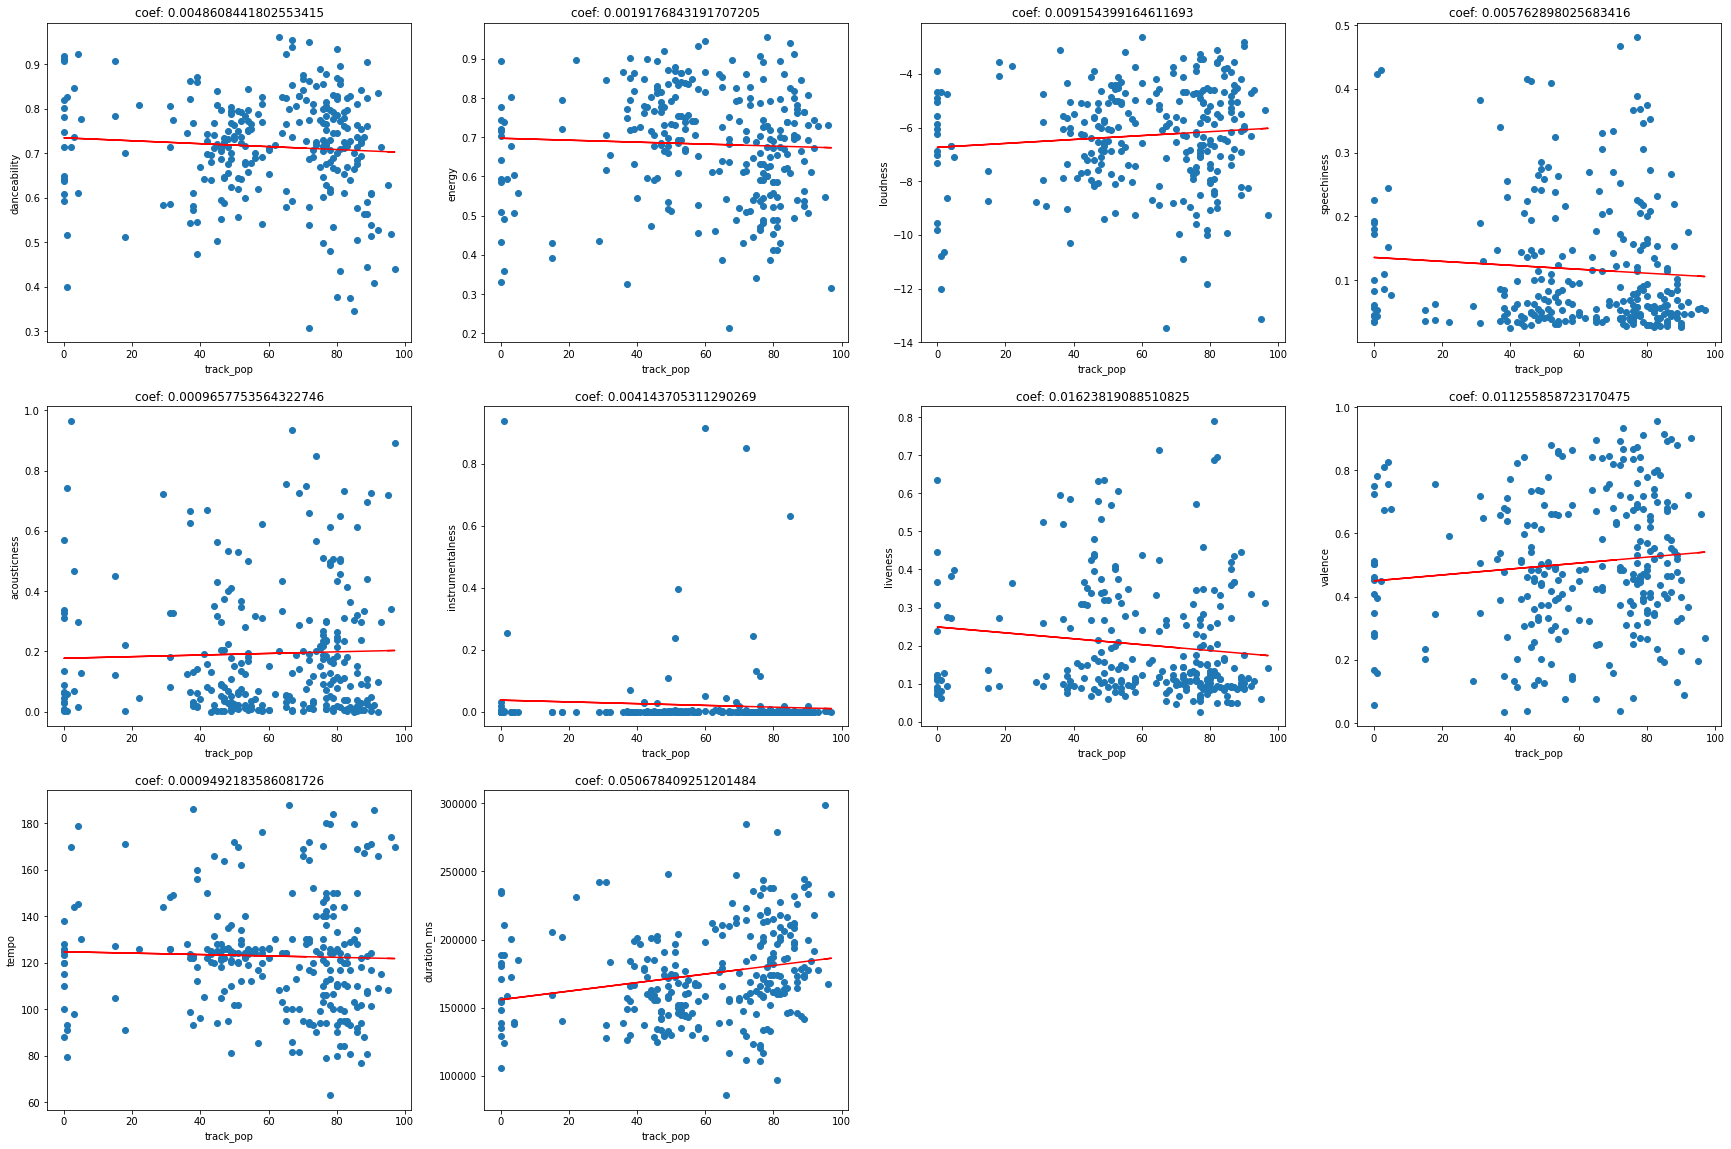

In [31]:
# Linear regression plot on each columns vs track_pop 
functions.linear_reg(df)

# Function Tests

In [32]:
#run the test file to test the fuctions in module
%run my_module/test_functions.py

# Conclusion

From the previous analysis, we found that the top five artist are 'Drake', 'The Weeknd', 'Harry Styles', 'Ed Sheeran','Justin Bieber'. And the top five track are 'Glimpse of Us','As It Was','Running Up That Hill (A Deal With God)','Late Night Talking','Jimmy Cooks (feat. 21 Savage)'. And the top five track for dance are: 'As it was', 'Late Night Talking', 'Running Up That Hill', 'Jimmy Cooks', 'Glimpse of Us'. From our plot and predict model, we noticed that the track popularity are more releated to artist popularity. 

# Extra Credit 

Based on my data analysis, I have import and used sklearn, seaborn module to display the plot and find the corelation. I have also developed some funcions to help me display the figure. These are the topic we didn't include in our lecture: 
- seaborn
- history plot(sns) 
- box plot(sns)
- data cleaning(dropna) 
- linear regression module using sklearn
- heatmap
- piechart
- sklearn
From developing there and learn the new module and tech, I spend a lot of time to working on that. And I believe these has beyond the requirement of the project and course material.  

## Github

https://github.com/Siyuan414/COGS18_Final_porject.git